In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 KB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 34.1 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [ ]:
import yfinance as yf
from datetime import datetime, timedelta
import numpy as np
import pandas as pd

# Returns Dataframe of company: (index) Date, Open, High, Low, Close, Volume, Dividends, Stock Splits
def getStockHistory(stockName, timeDiffInYears=1):
  tickerInstance = yf.Ticker(stockName)
  end_date = datetime.now().strftime('%Y-%m-%d')
  start_date = ( datetime.now() - timedelta(days= 365.24 * timeDiffInYears) ).strftime('%Y-%m-%d')
  history = tickerInstance.history(start = start_date, end = end_date)
  return history

# Returns Series(?)
def stockHistoryToDailyPrice(history):
  daily_prices = history['Open']
  return daily_prices

def stockHistoryToDailyVolume(history):
  daily_volumes = history['Volume']
  return daily_volumes[1:]

# Return Series with daily price return values, date as index
def dailyPriceToDailyPriceReturn(daily_price):
  dates = daily_price[1:].index
  temp = daily_price[1:].reset_index()['Open'] / daily_price[:-1].reset_index()['Open']
  temp = temp.apply(np.log)
  daily_price_return = pd.DataFrame({'Price Return': temp.values}, index=dates)
  return daily_price_return['Price Return'] # Remove column selection to get dataframe instead of series

def cross_correlation(timeSeries1, timeSeries2):
  xi_, xj_ = timeSeries1.mean(), timeSeries2.mean()
  len = timeSeries1.size
  numerator, denominator1, denominator2 = 0, 0, 0
  for t in range(len):
    xi, xj = timeSeries1.iloc[t], timeSeries2.iloc[t]
    numerator += (xi - xi_) * (xj - xj_)
    denominator1 += (xi - xi_) ** 2
    denominator2 += (xj - xj_) ** 2
  c = numerator / ( (denominator1 ** 0.5) * (denominator2 ** 0.5) )
  return c


In [ ]:
# Example code, no need to run
history = getStockHistory(stockName = 'TSLA')
h2 = getStockHistory(stockName = 'TSLA')
dp = stockHistoryToDailyPrice(history)
dp2 = stockHistoryToDailyPrice(h2)
dpr1 = dailyPriceToDailyPriceReturn(dp)
dpr2 = dailyPriceToDailyPriceReturn(dp2)
cross_correlation(dp, dp2)

1.0

In [ ]:
import itertools

# 15 most popularly traded stocks
stockNames = 'TSLA NVDA MSFT AAPL AMZN AMD GOOGL META GOOG PLTR BA NFLX COIN PYPL BABA'.split(' ')
stockHistories = {}

for stockName in stockNames:
  stockHistories[stockName] = getStockHistory(stockName)

correlationTable = pd.DataFrame(0.0, index = stockNames, columns=stockNames)

for pair in itertools.product(stockNames, repeat=2):
  s1, s2 = pair
  stock1_dailyClosePrice, stock2_dailyClosePrice = stockHistories[s1]['Close'], stockHistories[s2]['Close']
  # stock1_dailyVolume, stock2_dailyVolume = stockHistories[s1]['Volume'], stockHistories[s2]['Volume']
  # stock1_dailyPriceReturn, stock2_dailyPriceReturn = dailyPriceToDailyPriceReturn(stock1_dailyClosePrice), dailyPriceToDailyPriceReturn(stock2_dailyClosePrice)
  correlationTable[s1][s2] = cross_correlation(stock1_dailyClosePrice, stock2_dailyClosePrice)
correlationTable

,TSLA,NVDA,MSFT,AAPL,AMZN,AMD,GOOGL,META,GOOG,PLTR,BA,NFLX,COIN,PYPL,BABA
TSLA,1.000000,0.414140,0.746296,0.842264,0.906075,0.678123,0.824567,0.703150,0.825115,0.783708,-0.273754,-0.105415,0.735428,0.770916,0.072595
NVDA,0.414140,1.000000,0.813802,0.608360,0.575017,0.801236,0.689432,0.743587,0.686110,0.738336,0.557490,0.593302,0.754934,0.580521,0.532323
MSFT,0.746296,0.813802,1.000000,0.829563,0.841361,0.910866,0.909071,0.858908,0.908528,0.837023,0.181022,0.219279,0.800959,0.727756,0.428168
AAPL,0.842264,0.608360,0.829563,1.000000,0.848160,0.701603,0.757768,0.631474,0.758564,0.749397,0.145006,0.253167,0.740420,0.831000,0.108612
AMZN,0.906075,0.575017,0.841361,0.848160,1.000000,0.773789,0.917249,0.758470,0.919481,0.866205,-0.046152,0.135391,0.874666,0.892328,0.218023
AMD,0.678123,0.801236,0.910866,0.701603,0.773789,1.000000,0.889586,0.869802,0.887232,0.751525,0.106538,0.152766,0.757073,0.675500,0.447971
GOOGL,0.824567,0.689432,0.909071,0.757768,0.917249,0.889586,1.000000,0.862598,0.999752,0.887968,-0.053180,0.096689,0.865481,0.765833,0.383700
META,0.703150,0.743587,0.858908,0.631474,0.758470,0.869802,0.862598,1.000000,0.862578,0.762110,0.024118,0.070492,0.748262,0.599078,0.514216
GOOG,0.825115,0.686110,0.908528,0.758564,0.919481,0.887232,0.999752,0.862578,1.000000,0.885408,-0.051498,0.095323,0.863189,0.767350,0.390500
PLTR,0.783708,0.738336,0.837023,0.749397,0.866205,0.751525,0.887968,0.762110,0.885408,1.000000,0.094592,0.259311,0.892785,0.747865,0.332213


In [ ]:
# discarding correlation in the range -0.5 to 0.5
# for now discard negative values too since haven't thought of how to use that in the graph
# Taking inverse of correlation to be the distance
# Minus 1 to make diagonal 0 (distance of something to itself should be )
adjacencyMatrix = 1 / correlationTable[correlationTable > 0.5] - 1
adjacencyMatrix = adjacencyMatrix[adjacencyMatrix >= 0]

In [ ]:
adjacencyMatrix.at['TSLA','NVDA'] = 0.000000001
adjacencyMatrix.at['NVDA','TSLA'] = 0.000000001
adjacencyMatrix.at['NVDA','MSFT'] = 0.000000001
adjacencyMatrix.at['MSFT','NVDA'] = 0.000000001
adjacencyMatrix.at['TSLA', 'MSFT'] =0.000000002
adjacencyMatrix.at['MSFT','TSLA'] =0.000000002

adjacencyMatrix

,TSLA,NVDA,MSFT,AAPL,AMZN,AMD,GOOGL,META,GOOG,PLTR,BA,NFLX,COIN,PYPL,BABA
TSLA,0.000000e+00,1.000000e-09,2.000000e-09,0.187276,0.103662,4.746592e-01,0.212758,4.221720e-01,0.211952,0.275986,NaN,NaN,0.359752,0.297158,NaN
NVDA,1.000000e-09,2.220446e-16,1.000000e-09,0.643765,0.739080,2.480718e-01,0.450469,3.448322e-01,0.457493,0.354397,7.937531e-01,0.685483,0.324620,0.722590,0.878558
MSFT,2.000000e-09,1.000000e-09,2.220446e-16,0.205454,0.188550,9.785661e-02,0.100024,1.642691e-01,0.100682,0.194710,NaN,NaN,0.248504,0.374087,NaN
AAPL,1.872759e-01,6.437648e-01,2.054538e-01,0.000000,0.179022,4.253082e-01,0.319666,5.835956e-01,0.318281,0.334407,NaN,NaN,0.350584,0.203370,NaN
AMZN,1.036618e-01,7.390798e-01,1.885500e-01,0.179022,NaN,2.923414e-01,0.090217,3.184429e-01,0.087570,0.154462,NaN,NaN,0.143293,0.120665,NaN
AMD,4.746592e-01,2.480718e-01,9.785661e-02,0.425308,0.292341,2.220446e-16,0.124119,1.496863e-01,0.127101,0.330627,NaN,NaN,0.320877,0.480385,NaN
GOOGL,2.127579e-01,4.504690e-01,1.000237e-01,0.319666,0.090217,1.241187e-01,0.000000,1.592889e-01,0.000248,0.126166,NaN,NaN,0.155426,0.305769,NaN
META,4.221720e-01,3.448322e-01,1.642691e-01,0.583596,0.318443,1.496863e-01,0.159289,2.220446e-16,0.159315,0.312147,NaN,NaN,0.336431,0.669232,0.944707
GOOG,2.119519e-01,4.574926e-01,1.006821e-01,0.318281,0.087570,1.271006e-01,0.000248,1.593149e-01,0.000000,0.129422,NaN,NaN,0.158495,0.303187,NaN
PLTR,2.759861e-01,3.543971e-01,1.947097e-01,0.334407,0.154462,3.306269e-01,0.126166,3.121467e-01,0.129422,0.000000,NaN,NaN,0.120090,0.337140,NaN


In [ ]:
!pip install networkx
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


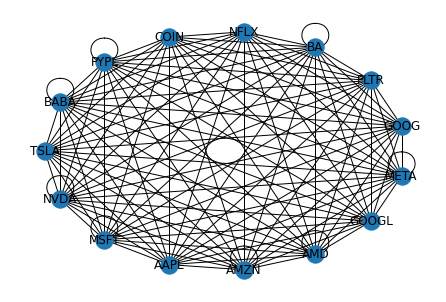

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

graph = nx.from_pandas_adjacency(adjacencyMatrix)
graph.name = "Stock Network"
nx.draw_shell(graph, with_labels=True)

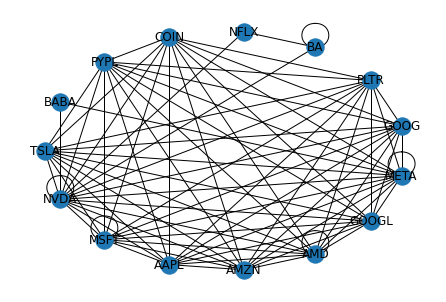

In [ ]:
import math
for edge in graph.edges:
  if math.isnan(graph.edges[edge[0], edge[1]]['weight']):
    graph.remove_edge(edge[0],edge[1])
nx.draw_shell(graph, with_labels=True)

# Next Steps:
1. Read "A Network Perspective..."
2. Current final result is Table with cross correlation.
3. Construct graph by setting opposite of correlation as distance between nodes

# Current:
- Have "adjacency", or rather "distance", matrix calculated by inversing correlation between nodes (stocks).

# Attempt 1
Going to directly implement CPR TOPSIS method
Steps:
- Done ~~Shortest Path and Number of shortest path between each node (using distance matrix previously calcualted)~~
- 3.1: Node Communication Probability sequence
- 3.2: New Node Correlation matrix based on relative entropy
- 3.3: CPR TOPSIS algorithm

In [ ]:
shortestPathLengths = dict(nx.all_pairs_dijkstra_path_length(graph))
shortestPathCount = dict()
for pair in itertools.product(stockNames, repeat=2):
  source, target = pair
  if source not in shortestPathCount:
    shortestPathCount[source] = dict()
  shortestPathCount[source][target] = sum([1 for p in nx.all_shortest_paths(graph, source, target, weight=lambda x,y,e: adjacencyMatrix[x][y])])

# Convert to DataFrame. Might not be needed.
shortestPathLengths = pd.DataFrame(shortestPathLengths)
shortestPathCount = pd.DataFrame(shortestPathCount)
shortestPathLengths

,TSLA,NVDA,MSFT,AAPL,AMZN,AMD,GOOGL,META,GOOG,PLTR,BA,NFLX,COIN,PYPL,BABA
TSLA,0.000000e+00,1.000000e-08,2.000000e-08,1.872759,1.036618,0.978566,1.000237,1.642691,1.002717,1.947097,7.937531,6.854832,2.469551,2.243263,8.785579
NVDA,1.000000e-08,0.000000e+00,1.000000e-08,1.872759,1.036618,0.978566,1.000237,1.642691,1.002717,1.947097,7.937531,6.854832,2.469551,2.243263,8.785579
MSFT,2.000000e-08,1.000000e-08,0.000000e+00,1.872759,1.036618,0.978566,1.000237,1.642691,1.002717,1.947097,7.937531,6.854832,2.469551,2.243264,8.785579
AMD,9.785661e-01,9.785661e-01,9.785661e-01,2.851325,2.015184,0.000000,1.241187,1.496863,1.243668,2.502850,8.916097,7.833398,2.795450,3.221830,9.764145
GOOGL,1.000237e+00,1.000237e+00,1.000237e+00,2.668400,0.878178,1.241187,0.000000,1.592889,0.002481,1.261663,8.937767,7.855068,1.554264,2.084823,9.785815
GOOG,1.002717e+00,1.002717e+00,1.002717e+00,2.665919,0.875697,1.243668,0.002481,1.593149,0.000000,1.264144,8.940248,7.857549,1.556744,2.082343,9.788296
AMZN,1.036618e+00,1.036618e+00,1.036618e+00,1.790222,0.000000,2.015184,0.878178,2.468846,0.875697,1.544616,8.974149,7.891450,1.432933,1.206646,9.822196
META,1.642691e+00,1.642691e+00,1.642691e+00,3.515450,2.468846,1.496863,1.592889,0.000000,1.593149,2.854552,9.580222,8.497523,3.147153,3.675492,9.447070
AAPL,1.872759e+00,1.872759e+00,1.872759e+00,0.000000,1.790222,2.851325,2.668400,3.515450,2.665919,3.334838,9.810290,8.727591,3.223155,2.033702,10.658337
PLTR,1.947097e+00,1.947097e+00,1.947097e+00,3.334838,1.544616,2.502850,1.261663,2.854552,1.264144,0.000000,9.884628,8.801929,1.200904,2.751262,10.732675


In [ ]:
# 3.1 Node Communication Probablity Sequence

# Communictaion Probablity Matrix (H)
H = pd.DataFrame(columns=stockNames, index=stockNames)

for pair in itertools.product(stockNames, repeat=2):
  source, target = pair
  if source == target:
    H.at[source, target]= 0.0
    continue
  else:
    H.at[source, target] = shortestPathCount.at[source, target] * 1/shortestPathLengths.at[source, target]
H

,TSLA,NVDA,MSFT,AAPL,AMZN,AMD,GOOGL,META,GOOG,PLTR,BA,NFLX,COIN,PYPL,BABA
TSLA,0.0,100000000.0,100000000.0,0.533972,0.964676,1.021903,0.999764,0.608757,0.99729,0.513585,0.125984,0.145882,0.404932,0.445779,0.113823
NVDA,100000000.0,0.0,100000000.0,0.533972,0.964676,1.021903,0.999764,0.608757,0.99729,0.513585,0.125984,0.145882,0.404932,0.445779,0.113823
MSFT,100000000.0,100000000.0,0.0,0.533972,0.964676,1.021903,0.999764,0.608757,0.99729,0.513585,0.125984,0.145882,0.809864,0.891558,0.113823
AAPL,0.533972,0.533972,1.067943,0.0,0.55859,0.350714,0.374756,0.284459,0.375105,0.299865,0.101934,0.114579,0.310255,0.491714,0.093823
AMZN,0.964676,0.964676,1.929351,0.55859,0.0,0.496233,1.138722,0.405048,1.141948,0.64741,0.111431,0.126719,0.697869,0.828744,0.10181
AMD,2.043807,1.021903,1.021903,0.350714,0.496233,0.0,0.80568,0.668064,0.804073,0.399545,0.112157,0.127659,0.357724,0.620765,0.102416
GOOGL,1.999527,0.999764,0.999764,0.374756,1.138722,0.80568,0.0,0.62779,403.092882,0.792605,0.111885,0.127306,0.643392,0.479657,0.102189
META,1.217514,0.608757,0.608757,0.284459,0.405048,0.668064,0.62779,0.0,0.627688,0.350318,0.104382,0.117681,0.317748,0.272072,0.105853
GOOG,1.99458,0.99729,0.99729,0.375105,1.141948,0.804073,403.092882,0.627688,0.0,0.791049,0.111854,0.127266,0.642366,0.480228,0.102163
PLTR,1.02717,0.513585,0.513585,0.299865,0.64741,0.399545,0.792605,0.350318,0.791049,0.0,0.101167,0.113611,0.832706,0.36347,0.093173


In [ ]:
L = shortestPathLengths.max().max()
L

16.723109420662745

# Notes
Currently, the distances are very small ie. mostly between 0-2
This might cause a problem in the calculation of the probablity sequence P

P = [p(1), p(2) ... p(L)]

Because, then only p(1) will be valid (L = 1.6..., thus no value for p(2) will be valid)

And even then, p(1) will be 10^-3 for most nodes as their max distance (ri) might be less than one.

## Possible Solution:
Multiply the distances by a factor of 10 to get richer information about their subtle differences without messing up whihc node is "most" important

In [ ]:
adjacencyMatrix = adjacencyMatrix * 10
adjacencyMatrix
# Go back and run NetworkX graph code

,TSLA,NVDA,MSFT,AAPL,AMZN,AMD,GOOGL,META,GOOG,PLTR,BA,NFLX,COIN,PYPL,BABA
TSLA,0.000000e+00,1.000000e-08,2.000000e-08,1.872759,1.036618,4.746592e+00,2.127579,4.221720e+00,2.119519,2.759861,NaN,NaN,3.597520,2.971579,NaN
NVDA,1.000000e-08,2.220446e-15,1.000000e-08,6.437648,7.390798,2.480718e+00,4.504690,3.448322e+00,4.574926,3.543971,7.937531e+00,6.854832,3.246197,7.225897,8.785579
MSFT,2.000000e-08,1.000000e-08,2.220446e-15,2.054538,1.885500,9.785661e-01,1.000237,1.642691e+00,1.006821,1.947097,NaN,NaN,2.485041,3.740869,NaN
AAPL,1.872759e+00,6.437648e+00,2.054538e+00,0.000000,1.790222,4.253082e+00,3.196658,5.835956e+00,3.182808,3.344066,NaN,NaN,3.505845,2.033702,NaN
AMZN,1.036618e+00,7.390798e+00,1.885500e+00,1.790222,NaN,2.923414e+00,0.902169,3.184429e+00,0.875697,1.544616,NaN,NaN,1.432933,1.206646,NaN
AMD,4.746592e+00,2.480718e+00,9.785661e-01,4.253082,2.923414,2.220446e-15,1.241187,1.496863e+00,1.271006,3.306269,NaN,NaN,3.208769,4.803853,NaN
GOOGL,2.127579e+00,4.504690e+00,1.000237e+00,3.196658,0.902169,1.241187e+00,0.000000,1.592889e+00,0.002481,1.261663,NaN,NaN,1.554264,3.057685,NaN
META,4.221720e+00,3.448322e+00,1.642691e+00,5.835956,3.184429,1.496863e+00,1.592889,2.220446e-15,1.593149,3.121467,NaN,NaN,3.364310,6.692321,9.447070
GOOG,2.119519e+00,4.574926e+00,1.006821e+00,3.182808,0.875697,1.271006e+00,0.002481,1.593149e+00,0.000000,1.294223,NaN,NaN,1.584950,3.031871,NaN
PLTR,2.759861e+00,3.543971e+00,1.947097e+00,3.344066,1.544616,3.306269e+00,1.261663,3.121467e+00,1.294223,0.000000,NaN,NaN,1.200904,3.371405,NaN


In [ ]:
P = dict()
r = shortestPathLengths.max()
# stock = 'TSLA'
# l=2
# print(list(shortestPathLengths[stock][shortestPathLengths[stock] <= l].index))
# H[stock][list(shortestPathLengths[stock][shortestPathLengths[stock] <= l].index)]

for stock in stockNames:
  P[stock] = []
  for l in range(1, math.ceil(L)):
    if l > r[stock]:
      val = 10**(-3)
    else:
      denominator = H[stock].sum() - H.at[stock,stock] #Should just be 0
      l_th_layer_neighborhood = list(shortestPathLengths[stock][shortestPathLengths[stock] <= l].index) # Confirm Definition of Lth layer neighborhood
      numerator = H[stock][l_th_layer_neighborhood].sum()

      val = numerator / denominator + (10** (-3) if numerator == 0 else 0)

    P[stock].append(val)
P

{'TSLA': [0.9999999551308056,
  0.9999999938179994,
  0.9999999980715543,
  0.9999999980715543,
  0.9999999980715543,
  0.9999999980715543,
  0.9999999988009667,
  0.9999999994308855,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001],
 'NVDA': [0.9999999707277839,
  0.9999999938179993,
  0.9999999980715543,
  0.9999999980715543,
  0.9999999980715543,
  0.9999999980715543,
  0.9999999988009667,
  0.9999999994308855,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001],
 'MSFT': [0.999999958980993,
  0.9999999895644446,
  0.9999999980715543,
  0.9999999980715543,
  0.9999999980715543,
  0.9999999980715543,
  0.9999999988009667,
  0.9999999994308855,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001],
 'AAPL': [0.001,
  0.4357868937627254,
  0.7569614430088255,
  0.9374033040544876,
  0.9374033040544876,
  0.9374033040544876,
  0.9374033040544876,
  0.9374033040544876,
  0.9605146150998221,
  0.9810752787611533,
  0.001,
  0.00

# Notes
- Confirm definition of L-th Layer neighborhood
- Say L is 16.5, so should it be rounded up always to p(17) or limited down to p(16)
- How to handle log(0) in relative entropy? For now adding 0.001 similar to the case when l>ri

In [ ]:
# 3.2 Correlation matrix based on relative entorpy

# Symmetric Correlation Matrix (U)
print(P,'\n---------------------------')
U = pd.DataFrame(index=stockNames, columns=stockNames)
for pair in itertools.product(stockNames, repeat=2):
  i, j = pair
  u_corr = 0
  for l in range(1, math.ceil(L)):
    try:
      u_corr += P[i][l-1] * math.log(P[i][l-1]/P[j][l-1])
      u_corr += P[j][l-1] * math.log(P[j][l-1]/P[i][l-1])
    except:
      print(i,j, l)
      print(P[j])
      print(P[j][l-1],P[i][l-1])
  U.at[i,j] = u_corr
U

{'TSLA': [0.9999999551308056, 0.9999999938179994, 0.9999999980715543, 0.9999999980715543, 0.9999999980715543, 0.9999999980715543, 0.9999999988009667, 0.9999999994308855, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001], 'NVDA': [0.9999999707277839, 0.9999999938179993, 0.9999999980715543, 0.9999999980715543, 0.9999999980715543, 0.9999999980715543, 0.9999999988009667, 0.9999999994308855, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001], 'MSFT': [0.999999958980993, 0.9999999895644446, 0.9999999980715543, 0.9999999980715543, 0.9999999980715543, 0.9999999980715543, 0.9999999988009667, 0.9999999994308855, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001], 'AAPL': [0.001, 0.4357868937627254, 0.7569614430088255, 0.9374033040544876, 0.9374033040544876, 0.9374033040544876, 0.9374033040544876, 0.9374033040544876, 0.9605146150998221, 0.9810752787611533, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001], 'AMZN': [0.24929296566797093, 0.8643237542410698, 0.9628399233474336, 0.96283992334

,TSLA,NVDA,MSFT,AAPL,AMZN,AMD,GOOGL,META,GOOG,PLTR,BA,NFLX,COIN,PYPL,BABA
TSLA,0.0,0.0,0.0,20.79822,7.883114,7.457519,6.899193,13.722026,6.899192,20.452016,69.57065,64.580868,27.212048,28.054157,97.114791
NVDA,0.0,0.0,0.0,20.79822,7.883114,7.457519,6.899193,13.722026,6.899192,20.452016,69.57065,64.580868,27.212049,28.054157,97.114791
MSFT,0.0,0.0,0.0,20.79822,7.883114,7.457519,6.899193,13.722026,6.899192,20.452016,69.57065,64.580868,27.212049,28.054157,97.114791
AAPL,20.79822,20.79822,20.79822,0.0,8.469782,9.32624,14.069726,6.843724,14.06993,0.177061,47.038001,39.919098,6.825915,6.921925,77.195856
AMZN,7.883114,7.883114,7.883114,8.469782,0.0,0.110258,1.032603,1.465176,1.032658,8.1835,58.089201,51.785003,14.996114,15.686403,88.473029
AMD,7.457519,7.457519,7.457519,9.32624,0.110258,0.0,0.635312,2.437653,0.63535,9.200387,57.7268,51.423945,15.921447,16.404264,87.608234
GOOGL,6.899193,6.899193,6.899193,14.069726,1.032603,0.635312,0.0,6.974418,0.0,13.656644,64.938681,58.605703,20.538671,21.391406,96.543735
META,13.722026,13.722026,13.722026,6.843724,1.465176,2.437653,6.974418,0.0,6.974623,6.807728,54.577383,48.292229,13.487825,13.896154,83.212495
GOOG,6.899192,6.899192,6.899192,14.06993,1.032658,0.63535,0.0,6.974623,0.0,13.656849,64.938873,58.605895,20.538876,21.391608,96.543935
PLTR,20.452016,20.452016,20.452016,0.177061,8.1835,9.200387,13.656644,6.807728,13.656849,0.0,49.596507,42.47678,6.848343,7.370541,81.045997


In [ ]:
S = 1 - U / U.max().max()
S

,TSLA,NVDA,MSFT,AAPL,AMZN,AMD,GOOGL,META,GOOG,PLTR,BA,NFLX,COIN,PYPL,BABA
TSLA,1.0,1.0,1.0,0.785839,0.918827,0.923209,0.928958,0.858703,0.928958,0.789404,0.283625,0.335005,0.719795,0.711124,0.0
NVDA,1.0,1.0,1.0,0.785839,0.918827,0.923209,0.928958,0.858703,0.928958,0.789404,0.283625,0.335005,0.719795,0.711124,0.0
MSFT,1.0,1.0,1.0,0.785839,0.918827,0.923209,0.928958,0.858703,0.928958,0.789404,0.283625,0.335005,0.719795,0.711124,0.0
AAPL,0.785839,0.785839,0.785839,1.0,0.912786,0.903967,0.855123,0.92953,0.855121,0.998177,0.515645,0.588949,0.929713,0.928724,0.205107
AMZN,0.918827,0.918827,0.918827,0.912786,1.0,0.998865,0.989367,0.984913,0.989367,0.915734,0.40185,0.466765,0.845584,0.838476,0.088985
AMD,0.923209,0.923209,0.923209,0.903967,0.998865,1.0,0.993458,0.974899,0.993458,0.905263,0.405582,0.470483,0.836055,0.831084,0.09789
GOOGL,0.928958,0.928958,0.928958,0.855123,0.989367,0.993458,1.0,0.928184,1.0,0.859376,0.33132,0.396532,0.788511,0.779731,0.00588
META,0.858703,0.858703,0.858703,0.92953,0.984913,0.974899,0.928184,1.0,0.928182,0.9299,0.438012,0.50273,0.861115,0.85691,0.143153
GOOG,0.928958,0.928958,0.928958,0.855121,0.989367,0.993458,1.0,0.928182,1.0,0.859374,0.331318,0.39653,0.788509,0.779729,0.005878
PLTR,0.789404,0.789404,0.789404,0.998177,0.915734,0.905263,0.859376,0.9299,0.859374,1.0,0.4893,0.562613,0.929482,0.924105,0.165462


In [ ]:
# 3.3 CPR TOPSIS

# Creating Adjacency Matrix. If nodes are adjacent, A(i,j) = S(i,j)
A = pd.DataFrame(index = stockNames, columns = stockNames)
for pair in itertools.product(stockNames, repeat=2):
  i, j = pair
  if math.isnan(adjacencyMatrix.at[i,j]) and i!=j:
    A.at[i,j] = 0.0
  else:
    A.at[i,j] = S.at[i,j]
A

,TSLA,NVDA,MSFT,AAPL,AMZN,AMD,GOOGL,META,GOOG,PLTR,BA,NFLX,COIN,PYPL,BABA
TSLA,1.0,1.0,1.0,0.785839,0.918827,0.923209,0.928958,0.858703,0.928958,0.789404,0.0,0.0,0.719795,0.711124,0.0
NVDA,1.0,1.0,1.0,0.785839,0.918827,0.923209,0.928958,0.858703,0.928958,0.789404,0.283625,0.335005,0.719795,0.711124,0.0
MSFT,1.0,1.0,1.0,0.785839,0.918827,0.923209,0.928958,0.858703,0.928958,0.789404,0.0,0.0,0.719795,0.711124,0.0
AAPL,0.785839,0.785839,0.785839,1.0,0.912786,0.903967,0.855123,0.92953,0.855121,0.998177,0.0,0.0,0.929713,0.928724,0.0
AMZN,0.918827,0.918827,0.918827,0.912786,1.0,0.998865,0.989367,0.984913,0.989367,0.915734,0.0,0.0,0.845584,0.838476,0.0
AMD,0.923209,0.923209,0.923209,0.903967,0.998865,1.0,0.993458,0.974899,0.993458,0.905263,0.0,0.0,0.836055,0.831084,0.0
GOOGL,0.928958,0.928958,0.928958,0.855123,0.989367,0.993458,1.0,0.928184,1.0,0.859376,0.0,0.0,0.788511,0.779731,0.0
META,0.858703,0.858703,0.858703,0.92953,0.984913,0.974899,0.928184,1.0,0.928182,0.9299,0.0,0.0,0.861115,0.85691,0.143153
GOOG,0.928958,0.928958,0.928958,0.855121,0.989367,0.993458,1.0,0.928182,1.0,0.859374,0.0,0.0,0.788509,0.779729,0.0
PLTR,0.789404,0.789404,0.789404,0.998177,0.915734,0.905263,0.859376,0.9299,0.859374,1.0,0.0,0.0,0.929482,0.924105,0.0


# Note
Maybe NetworkX has many of the functions already implemented. Ask Prof if we can use those?

Using betweeness centrality for "shortest path centrality" mentioned in research paper.

Limit precision in calculation. Causing errors such as AdjacencyMatrix(AMZN, AMZN) being NaN.

In [ ]:
# Using generated Code. Semi local Centrality

def semi_local_centrality(G, node):
    neighborhood = set(nx.all_neighbors(G, node))
    neighborhood
    subgraph = G.subgraph(neighborhood)
    semi_local = sum([nx.shortest_path_length(subgraph, node, n) for n in neighborhood])
    semi_local /= len(neighborhood)
    return semi_local

G = nx.from_pandas_adjacency(A.astype('float64'))
semi_local_centralities = {node: semi_local_centrality(G, node) for node in G.nodes()}
semi_local_centralities


{'TSLA': 0.9166666666666666,
 'NVDA': 0.9333333333333333,
 'MSFT': 0.9166666666666666,
 'AAPL': 0.9166666666666666,
 'AMZN': 0.9166666666666666,
 'AMD': 0.9166666666666666,
 'GOOGL': 0.9166666666666666,
 'META': 0.9230769230769231,
 'GOOG': 0.9166666666666666,
 'PLTR': 0.9166666666666666,
 'BA': 0.6666666666666666,
 'NFLX': 0.6666666666666666,
 'COIN': 0.9166666666666666,
 'PYPL': 0.9166666666666666,
 'BABA': 0.6666666666666666}

In [ ]:
# Shortest Path Centrality
shortestPathCentralities = nx.betweenness_centrality(G, weight = "weight")
shortestPathCentralities

{'TSLA': 0.0,
 'NVDA': 0.4175824175824176,
 'MSFT': 0.0,
 'AAPL': 0.0,
 'AMZN': 0.0,
 'AMD': 0.0,
 'GOOGL': 0.0,
 'META': 0.0,
 'GOOG': 0.0,
 'PLTR': 0.0,
 'BA': 0.0,
 'NFLX': 0.0,
 'COIN': 0.0,
 'PYPL': 0.0,
 'BABA': 0.05494505494505495}